# Final Project

## Company to People Graph

### Create the Network

Here, we create the graph by adding edges for the executives and Board of Director members. For executives, CEOs are given a weight of 2, whereas other positions are given a weight of 1. For Board of Directors, chairmen are given a weight of 2, vice-chairmen or lead directors are given weight of 1, and all other board members are given weight of 1.

Furthermore, we distinguish the edges using the position attribute.

Graph G is a multi graph that is used to construct the company to company graph CC.
Graph CP is multi directed graph showing links between people and companies, with companies to execs and BOD members to companies are the directions.

In [1]:
# your code here
import csv 
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# your code here
G = nx.MultiGraph()
CP = nx.MultiDiGraph()
file = csv.DictReader(open("data/exec.csv"))
companies = set([])
execs = set([])
for row in file:
    if row["Company"] != '':
        company = row["Company"]
        companies.add(company)
        
    if 'CEO' in row["Position"]:
        w = 2
    else:
        w = 1
       
    CP.add_edge(company, row["Name"], weight=float('inf') - w, position='exec')
    G.add_edge(company, row["Name"], weight=float('inf') - w, position='exec')
    CP.nodes[company]["type"] = 'company'
    CP.nodes[row["Name"]]["type"] = 'exec'
    execs.add(row["Name"])

In [3]:
file = csv.DictReader(open("data/bod.csv"))
bod = set([])
for row in file:
    if row["Company"] != '':
        company = row["Company"]
        companies.add(company)
        
    if row["Chairman"] == 'x':
        w = 2
    elif row["Vice Chairman/Lead Director"] == 'x':
        w = 1.5
    elif row["Board Member"] == 'x':
        w = 1
        
    CP.add_edge(row["Name"], company, weight=float('inf') - w, position='bod')
    G.add_edge(row["Name"], company, weight=float('inf') - w, position='bod')
    CP.nodes[row["Name"]]["type"] = 'bod'
    bod.add(row["Name"])

In [4]:
print(CP.number_of_nodes())
print(CP.number_of_edges())

2947
3159


### Degree Histogram

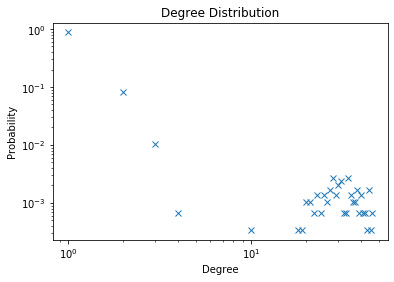

In [35]:
# your code here
deg_hist = nx.degree_histogram(CP)
nodes = CP.number_of_nodes()
probs = [x / nodes for x in deg_hist]
plt.loglog(probs, 'x')
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Probability")
plt.show()

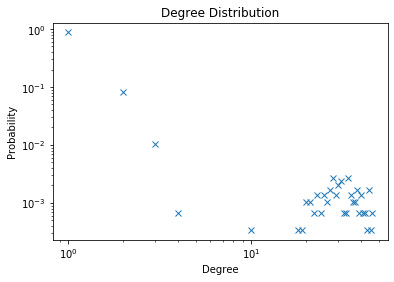

In [6]:
deg_hist = nx.degree_histogram(G)
nodes = G.number_of_nodes()
probs = [x / nodes for x in deg_hist]
plt.loglog(probs, 'x')
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Probability")
plt.show()

### Degree Centrality

In [7]:
# your code here
sorted_deg_centrality = sorted(nx.degree_centrality(CP).items(), key=lambda x: x[1], reverse=True)
sorted_deg_centrality

[('Costco Wholesale', 0.015614392396469789),
 ('Albertsons', 0.015614392396469789),
 ('Intel', 0.015274949083503055),
 ('Ford Motor', 0.01493550577053632),
 ('Procter & Gamble', 0.01493550577053632),
 ('Caterpillar', 0.01493550577053632),
 ('Lockheed Martin', 0.01493550577053632),
 ('AIG', 0.01493550577053632),
 ('Microsoft', 0.014596062457569585),
 ('Citigroup', 0.01425661914460285),
 ('Nike', 0.01425661914460285),
 ('Walmart', 0.013917175831636116),
 ('HCA Healthcare', 0.013917175831636116),
 ('CVS Health', 0.013577732518669382),
 ('IBM', 0.013577732518669382),
 ('Charter Communications', 0.013577732518669382),
 ('New York Life Insurance', 0.013577732518669382),
 ("Lowe's", 0.013238289205702648),
 ('Delta Air Lines', 0.013238289205702648),
 ('PepsiCo', 0.012898845892735912),
 ('Cisco Systems', 0.012898845892735912),
 ('United Continental Holdings', 0.012898845892735912),
 ('General Dynamics', 0.012898845892735912),
 ('Abbott Laboratories', 0.012898845892735912),
 ('Cigna', 0.01255940

### Eigenvector Centrality

In [8]:
# sorted_eigen_centrality = sorted(nx.eigenvector_centrality(G).items(), key=lambda x: x[1], reverse=True)

### Betweenness Centrality

In [9]:
sorted_bet_centrality = sorted(nx.betweenness_centrality(CP).items(), key=lambda x: x[1], reverse=True)
sorted_bet_centrality

[('Walt Disney', 0.0023003767878404372),
 ('Nike', 0.002034354660055302),
 ('Procter & Gamble', 0.0020254795717366473),
 ('Christine M McCarthy', 0.0018393332388194057),
 ('Dr Mark G Parker', 0.0015814946340293938),
 ('FedEx', 0.0008040599494926791),
 ('Delta Air Lines', 0.0007131191094482806),
 ('David S Taylor', 0.0007002098900756918),
 ('Alan B Graf Jr', 0.0006761203646393429),
 ('IBM', 0.0006576786226785016),
 ('JPMorgan Chase', 0.000597512439531257),
 ('Comcast', 0.0005937088302518335),
 ('Michelle A Peluso', 0.0005618968253693823),
 ('Stephen B Burke "Steve"', 0.0005504859975311117),
 ('Thasunda Brown Duckett', 0.0005319289946830153),
 ('Deborah Platt Majoras', 0.0004971202067319274),
 ('Valero Energy', 0.000491587684143675),
 ("Lowe's", 0.00046288772321711574),
 ('CVS Health', 0.0004429475897219561),
 ('Johnson & Johnson', 0.0004351098493885986),
 ('Alex Gorsky', 0.0004162070638787363),
 ('Marvin Ralph Ellison', 0.0004096371933051866),
 ('Caterpillar', 0.00039914845256495816),
 

### Closeness Centrality

In [10]:
sorted_close_centrality = sorted(nx.closeness_centrality(CP).items(), key=lambda x: x[1], reverse=True)
sorted_close_centrality

[('Walt Disney', 0.012983706720977598),
 ('Procter & Gamble', 0.011361341188131674),
 ('Robert Chapek "Bob"', 0.011032563980995374),
 ('Alan F Horn', 0.011032563980995374),
 ('Kevin A Mayer', 0.011032563980995374),
 ('Peter Rice', 0.011032563980995374),
 ('James Pitaro "Jimmy"', 0.011032563980995374),
 ('Justin Connolly', 0.011032563980995374),
 ('Jan Koeppen', 0.011032563980995374),
 ('George Kalogridis', 0.011032563980995374),
 ('Alan N Braverman', 0.011032563980995374),
 ('Christine M McCarthy', 0.011032563980995374),
 ('Zenia Mucha', 0.011032563980995374),
 ('Mary Jayne Parker', 0.011032563980995374),
 ('Joe Inzerillo', 0.011032563980995374),
 ('Aaron Laberge', 0.011032563980995374),
 ('Tilak Mandadi', 0.011032563980995374),
 ('Brent A Woodford', 0.011032563980995374),
 ('Jonathan S Headley', 0.011032563980995374),
 ('Helen Pak', 0.011032563980995374),
 ('Lowell J Singer', 0.011032563980995374),
 ('Robert A Iger "Bob"', 0.010942116895758037),
 ('Nike', 0.010716314133709605),
 ('Jon

In [11]:
data = {'Degree Centrality': [x[0] for x in sorted_deg_centrality], 
       'Betweenness Centrality': [x[0] for x in sorted_bet_centrality], 
       'Closeness Centrality': [x[0] for x in sorted_close_centrality]}
df = pd.DataFrame(data) 
df[:10] 

,Degree Centrality,Betweenness Centrality,Closeness Centrality
0,Costco Wholesale,Walt Disney,Walt Disney
1,Albertsons,Nike,Procter & Gamble
2,Intel,Procter & Gamble,"Robert Chapek ""Bob"""
3,Ford Motor,Christine M McCarthy,Alan F Horn
4,Procter & Gamble,Dr Mark G Parker,Kevin A Mayer
5,Caterpillar,FedEx,Peter Rice
6,Lockheed Martin,Delta Air Lines,"James Pitaro ""Jimmy"""
7,AIG,David S Taylor,Justin Connolly
8,Microsoft,Alan B Graf Jr,Jan Koeppen
9,Citigroup,IBM,George Kalogridis


## Company to Company Graph

CC is a graph showing links between companies with weights being the number of individuals shared on either BOD or exec. Constructed using neighbors from G.

In [12]:
CC = nx.Graph()

for i in companies:
    for j in companies:
        isect = np.intersect1d(list(G.neighbors(i)), list(G.neighbors(j)))
        if isect.shape[0] > 0:
            CC.add_edge(i, j, weight=int(isect.shape[0]))

In [13]:
#Remove self edges
edges = []
for edge in CC.edges():
    edges.append(edge)

for edge in edges:
    if(edge[0] == edge[1]):
        CC.remove_edge(edge[0], edge[1])

In [14]:
# Creating industry attribute dictionary
industries = {}

file = csv.DictReader(open("data/industryCC.csv"))
for row in file:
    company,industry = row.values()
    industries[company] = industry
    
nx.set_node_attributes(CC, values=industries, name='Industry')

In [15]:
nx.number_connected_components(CC)

17

In [16]:
sorted_comp_deg_centrality = sorted(nx.degree_centrality(CC).items(), key=lambda x: x[1], reverse=True)
sorted_comp_deg_centrality[:10]

[('3M', 0.11111111111111112),
 ('Procter & Gamble', 0.09090909090909091),
 ('Boeing', 0.09090909090909091),
 ('CVS Health', 0.08080808080808081),
 ('Morgan Stanley', 0.08080808080808081),
 ('Caterpillar', 0.08080808080808081),
 ('AbbVie', 0.08080808080808081),
 ('Merck', 0.07070707070707072),
 ('Target', 0.07070707070707072),
 ('United Technologies', 0.07070707070707072)]

In [17]:
sorted_comp_bet_centrality = sorted(nx.betweenness_centrality(CC).items(), key=lambda x: x[1], reverse=True)
sorted_comp_bet_centrality[:10]

[('3M', 0.10367936244013948),
 ('CVS Health', 0.07584869489358553),
 ('Boeing', 0.07558332949489412),
 ('Morgan Stanley', 0.06462923514562352),
 ('Microsoft', 0.0644083970550921),
 ('Procter & Gamble', 0.06406745533896396),
 ('Johnson & Johnson', 0.05918179200492126),
 ('MetLife', 0.05911570943947531),
 ("Lowe's", 0.05900218648090523),
 ('United Technologies', 0.05096610138217691)]

In [18]:
sorted_comp_eig_centrality = sorted(nx.eigenvector_centrality(CC).items(), key=lambda x: x[1], reverse=True)
sorted_comp_eig_centrality[:10]

[('3M', 0.3574074037990005),
 ('Boeing', 0.29032854644364964),
 ('AbbVie', 0.27667679471196677),
 ('Abbott Laboratories', 0.27055350579783854),
 ('Caterpillar', 0.25028674609905316),
 ('IBM', 0.2218983128277399),
 ('FedEx', 0.21130094703990127),
 ('Merck', 0.19512054193671002),
 ('Procter & Gamble', 0.1933091148623952),
 ('Morgan Stanley', 0.17345350884682068)]

In [19]:
sorted_comp_close_centrality = sorted(nx.closeness_centrality(CC).items(), key=lambda x: x[1], reverse=True)
sorted_comp_close_centrality[:10]

[('3M', 0.3126072041166381),
 ('Procter & Gamble', 0.29454545454545455),
 ('Caterpillar', 0.28940055577610163),
 ('Boeing', 0.28940055577610163),
 ('Abbott Laboratories', 0.28940055577610163),
 ('AbbVie', 0.28814229249011863),
 ('Morgan Stanley', 0.28689492325855964),
 ('IBM', 0.2856583072100314),
 ('FedEx', 0.2856583072100314),
 ('Merck', 0.28443230589153334)]

In [20]:
data = {'Degree Centrality': [x[0] for x in sorted_comp_deg_centrality], 
       'Betweenness Centrality': [x[0] for x in sorted_comp_bet_centrality], 
       'Eigenvector Centrality': [x[0] for x in sorted_comp_eig_centrality], 
       'Closeness Centrality': [x[0] for x in sorted_comp_close_centrality]}
df = pd.DataFrame(data) 
df[:10] 

,Degree Centrality,Betweenness Centrality,Eigenvector Centrality,Closeness Centrality
0,3M,3M,3M,3M
1,Procter & Gamble,CVS Health,Boeing,Procter & Gamble
2,Boeing,Boeing,AbbVie,Caterpillar
3,CVS Health,Morgan Stanley,Abbott Laboratories,Boeing
4,Morgan Stanley,Microsoft,Caterpillar,Abbott Laboratories
5,Caterpillar,Procter & Gamble,IBM,AbbVie
6,AbbVie,Johnson & Johnson,FedEx,Morgan Stanley
7,Merck,MetLife,Merck,IBM
8,Target,Lowe's,Procter & Gamble,FedEx
9,United Technologies,United Technologies,Morgan Stanley,Merck


In [21]:
print(CC.number_of_nodes())
print(CC.number_of_edges())

100
160


### Connected Components

In [22]:
connected_components = list(nx.connected_component_subgraphs(CC))
largest_cc = connected_components[0]
print("Size of largest connected_component:", largest_cc.number_of_nodes())
deg_hist = nx.degree_histogram(largest_cc)
nodes = largest_cc.number_of_nodes()
total = 0
for index, val in enumerate(deg_hist):
    total += index * val
print(f"Average node degree in largest connected component: {total / nodes :.4f}")

Size of largest connected_component: 82
Average node degree in largest connected component: 3.8537


### Degree Distribution
Looking at the degree distribution of the whole CC graph as well as the largest connected component

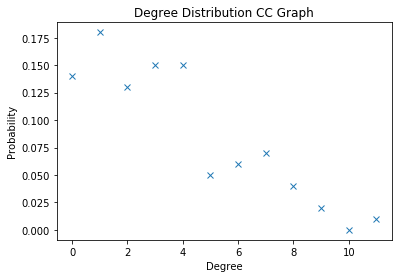

In [23]:
nodes_CC = CC.number_of_nodes()
deg_hist_CC = nx.degree_histogram(CC)
probs = [x / nodes_CC for x in deg_hist_CC]
plt.plot(probs, 'x')
plt.title("Degree Distribution CC Graph")
plt.xlabel("Degree")
plt.ylabel("Probability")
plt.show()

In [24]:
total = 0
for index, val in enumerate(probs):
    total += index * val
    
print(total)

3.1999999999999997


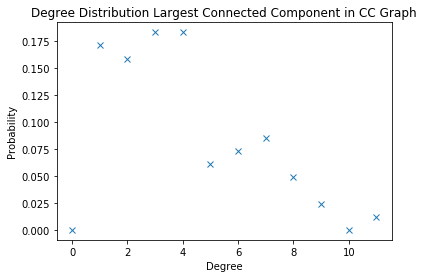

In [25]:
nodes = largest_cc.number_of_nodes()
deg_hist = nx.degree_histogram(largest_cc)
probs = [x / nodes for x in deg_hist]
plt.plot(probs, 'x')
plt.title("Degree Distribution Largest Connected Component in CC Graph")
plt.xlabel("Degree")
plt.ylabel("Probability")
plt.show()

In [26]:
total = 0
for edge in CC.edges:
    total += CC[edge[0]][edge[1]]['weight'] 

    
print(total / CC.number_of_edges())

1.25625


### Clique Detection

In [27]:
cliques = list(nx.find_cliques(CC))
cliques_largest_cc = list(nx.find_cliques(largest_cc))

print(f"Percent of cliques in largest connected component: {(len(cliques_largest_cc) / len(cliques))*100 :.4f}%") 

Percent of cliques in largest connected component: 87.3016%


In [28]:
print("Size of largest maximal clique:", nx.graph_clique_number(CC))

Size of largest maximal clique: 4


### Assortativity

In [29]:
nx.attribute_assortativity_coefficient(CC, 'Industry')

-0.03552936975540081

In [30]:
mapping = {'Retail': 0, 
           'Healthcare': 1, 
           'Technology': 2, 
           'Industrials': 3, 
           'Natural Resources': 4, 
           'Insurance': 5, 
           'Financial': 6, 
           'Media': 7,
           'Freight': 8, 
           'Real Estate': 9, 
           'Telco': 10,
           'Motor Vehicles': 11}

attribute_matrix = nx.attribute_mixing_matrix(CC, attribute='Industry', mapping=mapping)

In [31]:
# cross_char = 0


# for edge in CC.edges():
#     if G[edge[0]]['Industry'] != G[edge[1]]['Industry']:
        